In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(10, 8)})
pd.set_option('display.max_columns', 1500)
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [3]:
df = pd.read_csv('age_final_numeric_corr_2.csv')
df.head()

,target,CALCULATION_METHOD_ID,DATA_VOLUME_WEEKDAYS,AVG_ARPU,phone_value,lifetime,how_long_same_model,ecommerce_score,MONOBANK,fb_volume,fb_count,instagram_volume,viber_volume,viber_count,youtube_volume,youtube_count,google_volume,google_count,gmail_volume,gmail_count,twitter_volume,twitter_count,itunes_volume,snapchat_volume,snapchat_count,linkedin_volume,linkedin_count,badoo_count,applemaps_volume,applemaps_count,cafe,entertain,1020,370,4659,5724,Apple,CITRUS.UA,FACEBOOK,Google,Instagram,OLX,Telegram,V B,VKcom,Viber,monobank,device_brand_Apple,device_brand_Meizu,device_brand_Nokia,device_brand_Samsung,device_brand_Xiaomi,software_os_vendor_Nokia,software_os_vendor_Samsung,software_os_name_40,software_os_name_Android,software_os_name_iOS,device_type_rus_smartphone,SCORING_MEDIUM,SCORING_VERY LOW
0,2,1,97.518,119.665600,3.0,152.933333,22.0,0,0.0,1.2284,37.52,53.2015,1.5190,56.10,0.0234,2.00,10.7283,243.52,0.3263,6.71,0.0000,0.00,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,0.00,8.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,0,0,1,0,1,1,0
1,2,1,193.537,63.873725,2.0,143.366667,1.0,1,0.0,12.4769,93.19,60.4140,1.4249,36.29,0.8938,1.68,7.3500,42.03,0.0000,0.00,0.0399,2.03,1.1109,0.0,0.0,0.0,0.0,0.0,0.2515,12.06,3.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,1,1,0,0
2,4,1,0.000,0.999992,4.0,122.100000,25.0,0,0.0,0.0000,0.00,0.0000,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,6,2,0.000,55.019458,4.0,143.200000,15.0,0,0.0,0.0000,0.00,0.0000,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,1,0,1,0,0,0,1,0
4,6,2,87.435,49.031008,3.0,196.300000,1.0,0,0.0,0.0688,5.61,0.0000,0.4792,23.77,0.0261,0.29,10.0046,193.81,0.0082,0.84,0.0071,0.45,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,1,0,1,0,0


In [4]:
df.shape
label = df['target']
df_mod = df.drop('target', axis=1)
# label.head()

In [5]:
X = StandardScaler().fit_transform(df_mod)
pd.DataFrame(pairwise_distances(X))

0          1         2          3         4         5         6      \
0      0.000000   8.901962  8.078379   9.938560  8.236008  7.771411  8.670775   
1      8.901962   0.000000  8.837040  10.811147  8.527893  9.057393  6.303841   
2      8.078379   8.837040  0.000000   8.004600  7.717460  5.072699  6.545198   
3      9.938560  10.811147  8.004600   0.000000  9.460389  7.150631  9.299856   
4      8.236008   8.527893  7.717460   9.460389  0.000000  7.270935  8.008175   
...         ...        ...       ...        ...       ...       ...       ...   
28425  7.524203   7.838702  6.847270   8.810713  7.290305  5.914388  6.380494   
28426  8.181944   6.310198  6.623979   8.914593  7.420966  6.215205  4.970766   
28427  7.782913   7.939884  6.197346   8.874389  6.539409  6.789255  5.858165   
28428  7.222646   6.996872  6.442426   8.437901  5.589448  6.039260  6.536251   
28429  6.622260   7.703386  4.578269   8.162821  6.127192  5.373987  5.394524   

           7          8         9          10        11        12     \
0       8.790423  10.659518  7.079618   7.032925  9.383329  6.820887   
1       9.011076  11.248629  7.213931  10.417834  9.761890  8.038545   
2       9.049352   6.958328  6.542260  10.245332  5.026159  6.331434   
3      11.308005   3.986246  9.284050  11.742138  6.251691  8.298907   
4       9.213706  10.010857  7.011918  10.077896  8.768739  6.564819   
...          ...        ...       ...        ...       ...       ...   
28425   8.614773   9.701709  5.543258   7.848358  8.054899  3.130436   
28426   9.256472   9.193368  7.032152  10.405079  8.228292  6.779145   
28427   8.812616   9.288355  3.951870   8.980356  7.502657  4.877833   
28428   7.675424   9.015884  4.560652   9.171493  7.616079  4.636072   
28429   7.754286   8.322189  4.618769   8.572625  6.732362  4.172357   

           13        14         15        16        17        18        19     \
0      10.679793  8.183263  10.092166  7.684676  8.986939  7.481780  8.285668   
1       6.987012  8.615215  10.746975  8.569398  9.379671  7.934702  8.495158   
2      10.466572  4.449592   6.209362  4.934064  4.033236  5.886064  6.897722   
3      11.823576  8.009324   9.655756  7.126341  7.057746  8.225367  8.898556   
4      10.122752  7.710337   9.358779  7.392004  7.927734  5.687731  6.524437   
...          ...       ...        ...       ...       ...       ...       ...   
28425   9.762887  4.952253   8.690065  5.993854  7.337327  4.356377  6.139355   
28426   7.123356  7.109326   8.425089  6.136450  7.333661  5.966394  7.062376   
28427   9.874169  5.508564   8.828297  6.834242  6.811608  4.522360  3.284160   
28428   8.198113  6.052350   8.337766  5.207987  6.541700  3.851075  4.905429   
28429   9.520830  4.681006   7.706013  5.247659  6.028757  3.596044  5.037596   

          20         21        22        23        24        25         26     \
0      6.894403   8.660231  9.272073  8.848668  7.838250  7.014247   9.502626   
1      7.125165   9.730490  9.792325  9.599929  7.488913  8.068162   9.247240   
2      6.910673   9.203496  8.193780  8.260230  8.025308  5.563292   9.097584   
3      8.859895  10.998247  8.878427  9.909982  9.763917  8.675209  10.686000   
4      6.922049   8.899590  9.137287  8.621088  6.963103  6.565852   8.230897   
...         ...        ...       ...       ...       ...       ...        ...   
28425  3.702774   8.351810  7.591406  5.846262  5.933194  5.377376   7.448470   
28426  7.527496   8.369995  8.810995  9.077983  7.618872  5.787667   8.817985   
28427  5.482008   9.138742  7.756000  6.727890  6.937145  5.515106   8.321489   
28428  4.432791   7.161664  7.937015  7.162143  4.767591  5.094706   6.802742   
28429  5.025700   7.992487  7.296479  6.732721  6.500305  3.190514   7.801193   

          27         28         29        30        31        32     \
0      8.521472  10.679151  10.766812  7.657895  7.443079  7.196861   
1      8.226761  11.272455  11.013277  6.958217  7.564942  7.641312   
2      7.4619

In [6]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)
labels = kmeans.predict(X)

print(dict(zip(df.target, labels)))

{2: 0, 4: 1, 6: 4, 5: 5, 1: 0, 3: 0}


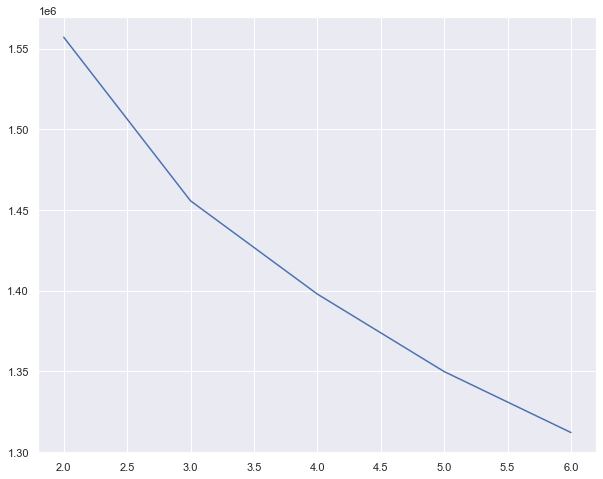

In [7]:
crit = []
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=15)
    kmeans.fit(X)
    crit.append(kmeans.inertia_)
    
plt.plot(range(2,7), crit)
plt.show()
# 4 groups can be defined (before was only 2-3)

In [8]:
pca = PCA(n_components=3)
pca.fit(X)
Z = pca.transform(X)
print(Z)
pca.explained_variance_ratio_.cumsum()

[[ 1.4482994  -0.76986272  0.30533618]
 [ 4.32064042  2.73101176 -0.89915303]
 [-2.79647549  1.08787263  0.53069627]
 ...
 [-0.6649646  -1.6048934  -1.19981645]
 [ 0.17289173 -0.80708731 -1.00611668]
 [-1.10477439 -0.72152923 -1.24316292]]


array([0.11449293, 0.17934648, 0.22453973])

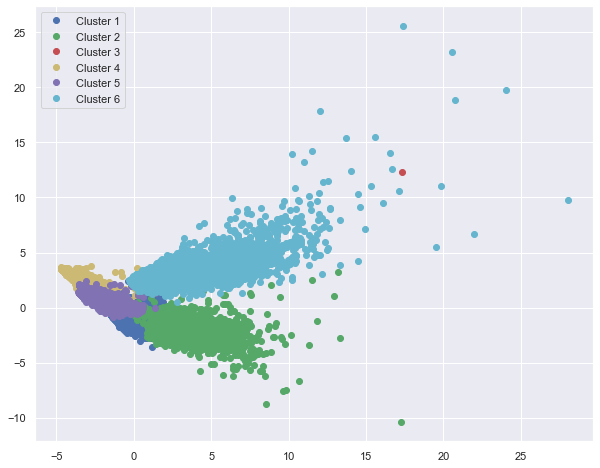

In [9]:
plt.plot(Z[labels == 0, 0], Z[labels == 0, 1], 'bo', label='Cluster 1')
plt.plot(Z[labels == 1, 0], Z[labels == 1, 1], 'go', label='Cluster 2')
plt.plot(Z[labels == 2, 0], Z[labels == 2, 1], 'ro', label='Cluster 3')
plt.plot(Z[labels == 3, 0], Z[labels == 3, 1], 'yo', label='Cluster 4')
plt.plot(Z[labels == 4, 0], Z[labels == 4, 1], 'mo', label='Cluster 5')
plt.plot(Z[labels == 5, 0], Z[labels == 5, 1], 'co', label='Cluster 6')
plt.legend(loc=0)
# clusters 3, 4, 1 merged together (hard to extract) - 19 features
# clusters 5, 4, 1 merged together (hard to extract) - 59 features

In [10]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2', 'PC3'], index=df_mod.columns[:])
loading_matrix
# PC1 - device type/volumes
# PC2 - content volumes
# PC3 - device/software types/scores

,PC1,PC2,PC3
CALCULATION_METHOD_ID,-0.228891,0.244692,-0.136357
DATA_VOLUME_WEEKDAYS,0.778003,0.016673,0.401867
AVG_ARPU,0.363344,0.210159,-0.069467
phone_value,-0.671950,-0.011420,0.416725
lifetime,-0.107386,0.120624,-0.176532
how_long_same_model,-0.271421,0.209413,0.055640
ecommerce_score,0.526081,-0.155915,0.143621
MONOBANK,0.147236,-0.002043,0.097181
fb_volume,0.535955,0.016848,0.231543
fb_count,0.646407,-0.185855,0.313296


In [11]:
pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X)
X_train_reduced.shape

(28430, 45)

In [12]:
from sklearn.svm import SVC
from sklearn.metrics import matthews_corrcoef
# support vextors based on libsvm -> one-vs-one scheme
svm_clf = SVC(kernel='rbf', random_state=42, verbose=3)
svm_clf.fit(X_train_reduced, label)
y_test_pred_svm = svm_clf.predict(X_train_reduced)
f1_score(label, y_test_pred_svm, average='macro')

[LibSVM]

0.49044851058893185

In [13]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(label, y_test_pred_svm)

0.38750698322476557

In [14]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=1)
Z = tsne.fit_transform(X)
print(Z)

[[ 11.008933   -7.815909 ]
 [-31.182903  -35.704067 ]
 [ 11.459349   67.54106  ]
 ...
 [ 34.664867  -42.40266  ]
 [-29.90023    -2.3431773]
 [ 20.847845   40.255333 ]]


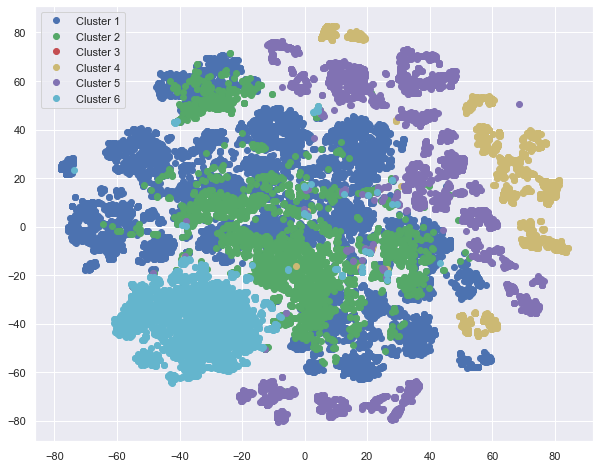

In [15]:
plt.plot(Z[labels == 0, 0], Z[labels == 0, 1], 'bo', label='Cluster 1')
plt.plot(Z[labels == 1, 0], Z[labels == 1, 1], 'go', label='Cluster 2')
plt.plot(Z[labels == 2, 0], Z[labels == 2, 1], 'ro', label='Cluster 3')
plt.plot(Z[labels == 3, 0], Z[labels == 3, 1], 'yo', label='Cluster 4')
plt.plot(Z[labels == 4, 0], Z[labels == 4, 1], 'mo', label='Cluster 5')
plt.plot(Z[labels == 5, 0], Z[labels == 5, 1], 'co', label='Cluster 6')
plt.legend(loc=0)
# again 3,4,1 clusters mixed + 6th with 3-4 - 19 features
# 2,1 clusters mixed + 3rd class either not defined or overlapped - 59 features